# Grade Predictor
## Using linear Regression

In [1]:
# Data manipulation and analysis library
import pandas as pd 

# Numerical computing library
import numpy as np

# Machine learning library
import sklearn

# Plotting library
import matplotlib.pyplot as pyplot

# Module for object serialization and de-serialization
import pickle

# Import linear regression models
from sklearn import linear_model

# Utility for shuffling data
from sklearn.utils import shuffle

# Styling for matplotlib
from matplotlib import style

In [2]:
# Read a CSV file into a pandas DataFrame
data = pd.read_csv("Student Mat.csv", sep=";")

# Print the first few rows of the DataFrame
print(data.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [3]:
# Select specific columns from the DataFrame
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

# Print the first few rows of the modified DataFrame
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


# **Attributes and Labels**

Definition of both: Labels represent the desired outcomes or predictions we want to make, while features are the measurable characteristics or attributes of the data that help us make those predictions.


In [4]:
# Define the target variable
predict = "G3"

# Create feature matrix X by dropping the target variable
x = np.array(data.drop(predict, axis=1))

# Create target vector y
y = np.array(data[predict])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [5]:
# Create a linear regression model
Linear = linear_model.LinearRegression()

# Train the model on the training data
Linear.fit(x_train, y_train)

# Calculate the model's accuracy on the test data
acc = Linear.score(x_test, y_test)

# Print the accuracy
print(acc)

0.9110336713726972


In [6]:
# Save the model to a file
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(Linear, f)

# Load the model from the file
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

# Print model coefficients and intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

# Make predictions on the test set
predictions = linear.predict(x_test)

# Print predictions alongside actual features and target values
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

Coefficient: 
 [ 0.1681272   0.9655291  -0.21180762 -0.28612481  0.03806426]
Intercept: 
 -1.433298033093516
9.05603455125333 [10 10  4  0  0] 10
13.732662782000117 [12 14  3  0  7] 14
8.514120680087741 [10  9  2  0  0] 9
8.566072483991746 [ 8  8  1  0 30] 8
6.925108791893514 [7 8 4 0 8] 8
17.91007925380206 [17 17  2  0 13] 17
9.85958460181868 [11 10  1  0  0] 10
16.168102592826436 [15 16  3  0  7] 15
10.348803775889685 [12 10  2  0 14] 11
11.070077166824204 [11 11  2  0 12] 11
10.961500557086326 [10 11  1  0  8] 10
10.214935995405396 [12 10  2  1 18] 10
9.818423256160711 [11 10  2  1 12] 10
14.01427500489672 [14 14  2  0  0] 14
19.388125190081894 [18 18  1  1 24] 18
2.821651560128668 [7 4 1 2 0] 0
18.98909338049981 [18 18  1  0  6] 18
8.014069471779992 [ 6  9  1  2 14] 8
3.6496902375117983 [7 5 3 1 0] 0
12.035606271270154 [11 12  2  0 12] 11
11.917608665697419 [12 12  2  1 12] 13
9.555778297400318 [10 10  2  0  2] 10
14.388061675417502 [13 15  4  0  0] 15
13.488939055690828 [14 13  1 

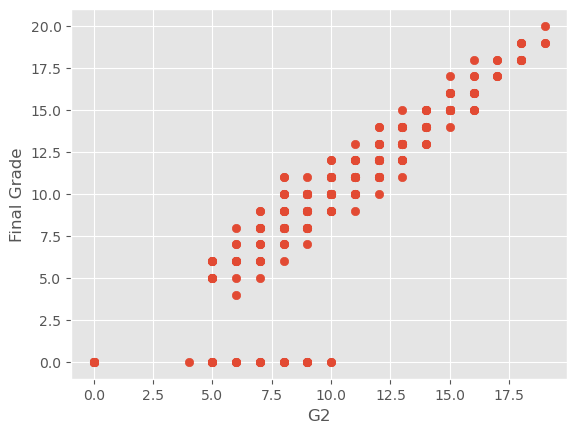

In [7]:
# Set the style for the plot
style.use("ggplot")

# Define the predictor variable to plot
p = "G2"

# Create a scatter plot
pyplot.scatter(data[p], data["G3"])

# Set the x-axis label
pyplot.xlabel(p)

# Set the y-axis label
pyplot.ylabel("Final Grade")

# Display the plot
pyplot.show()